# Predicting Early Stage Diabetes Risk in Indivisuals using Machine Learning

## Data Scources
* ### [https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset]()
* ### [https://archive.ics.uci.edu/ml/machine-learning-databases/00529/]()

# Importing Preprocessing and Visualizing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem at Hand

# Importng Machine Learning libraries

In [3]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Reading the Dataset

In [105]:
df=pd.read_csv("./data/diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Checking for null values

In [106]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# Type of data in the Dataset

In [107]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [108]:
df.columns.str.lower()

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [109]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [110]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

# Label Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
label_enc=list((df.columns)[2:-1])
label_enc

['polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity']

In [117]:
le=LabelEncoder()

In [118]:
for col in label_enc:
    df[col]=le.fit_transform(df[col].astype("str"))

In [119]:
def encoded(li):
    for i in range(len(li)):
        print(f"{li[i]} = {i}")

In [120]:
print("For the overall dataset")
encoded(le.classes_)

For the overall dataset
No = 0
Yes = 1


In [121]:
le_gender=LabelEncoder()
le_class=LabelEncoder()
df['gender']=le_gender.fit_transform(df["gender"].astype("str"))
df['class']=le_class.fit_transform(df["class"].astype("str"))

In [122]:
print("For Diabetes test : ")
encoded(le_class.classes_)

For Diabetes test : 
Negative = 0
Positive = 1


In [123]:
print("For the Gender : ")
encoded(le_gender.classes_)

For the Gender : 
Female = 0
Male = 1


In [124]:
df.dtypes

age                   int64
gender                int32
polyuria              int32
polydipsia            int32
sudden_weight_loss    int32
weakness              int32
polyphagia            int32
genital_thrush        int32
visual_blurring       int32
itching               int32
irritability          int32
delayed_healing       int32
partial_paresis       int32
muscle_stiffness      int32
alopecia              int32
obesity               int32
class                 int32
dtype: object

# EDA
## Analyzing and Plotting Data

In [125]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [126]:
df.describe().iloc[:,0].to_frame()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [127]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Negative = 0
Positive = 1


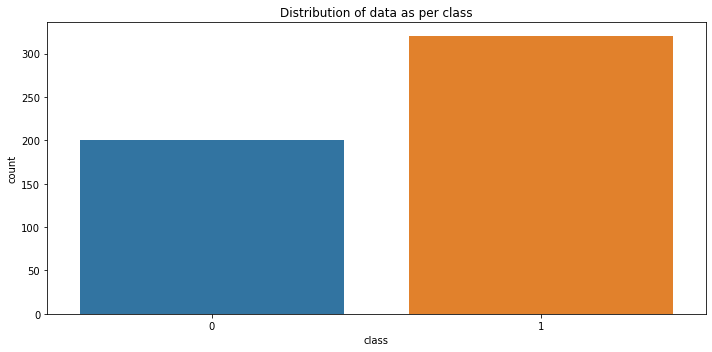

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(df["class"])
plt.title("Distribution of data as per class")
plt.tight_layout()
encoded(le_class.classes_)

Female = 0
Male = 1


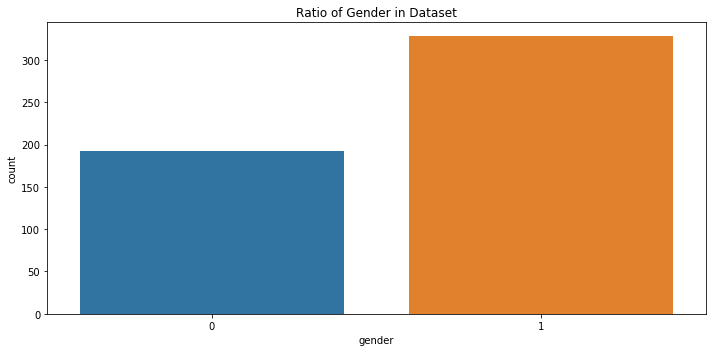

In [150]:
plt.figure(figsize=(10,5))
sns.countplot(df['gender'])
plt.title("Ratio of Gender in Dataset")
plt.tight_layout()
encoded(le_gender.classes_)

In [147]:
#Finding the min and max age for Diabetes.
print("Max",df['age'].max())
print("Min",df['age'].min())

Max 90
Min 16


In [161]:
labels=["less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80 and more"]
bins=[0,10,20,30,40,50,60,70,80,90]

In [163]:
frq_df=df.groupby([pd.cut(df['age'],bins=bins,labels=labels)]).size()

In [165]:
frq_df

age
less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
50-60           127
60-70            66
70-80            10
80 and more       4
dtype: int64

In [167]:
frq_df=frq_df.reset_index(name="count")

In [168]:
frq_df.head()

,age,count
0,less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


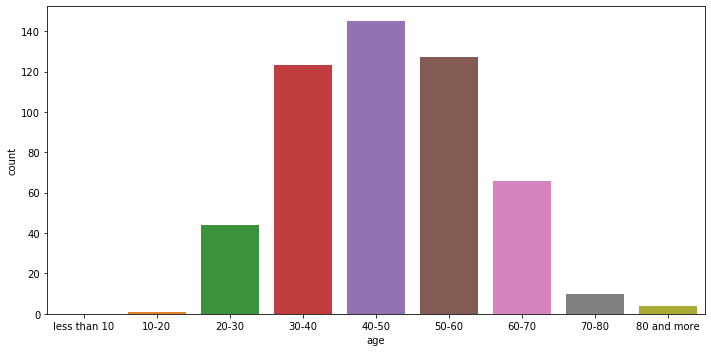

In [172]:
plt.figure(figsize=(10,5))
sns.barplot(data=frq_df,x="age",y="count")
plt.tight_layout()

Text(0.5, 1.0, 'Frequency Distribtion of age')

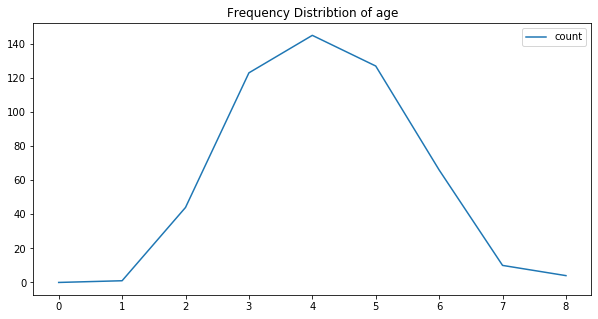

In [176]:
frq_df.plot(kind="line",figsize=(10,5))
plt.title("Frequency Distribtion of age")


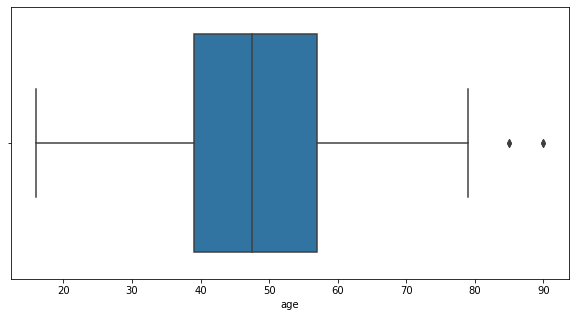

In [180]:
plt.figure(figsize=(10,5))
sns.boxplot(df["age"])

# Relation of various features with Diabetes

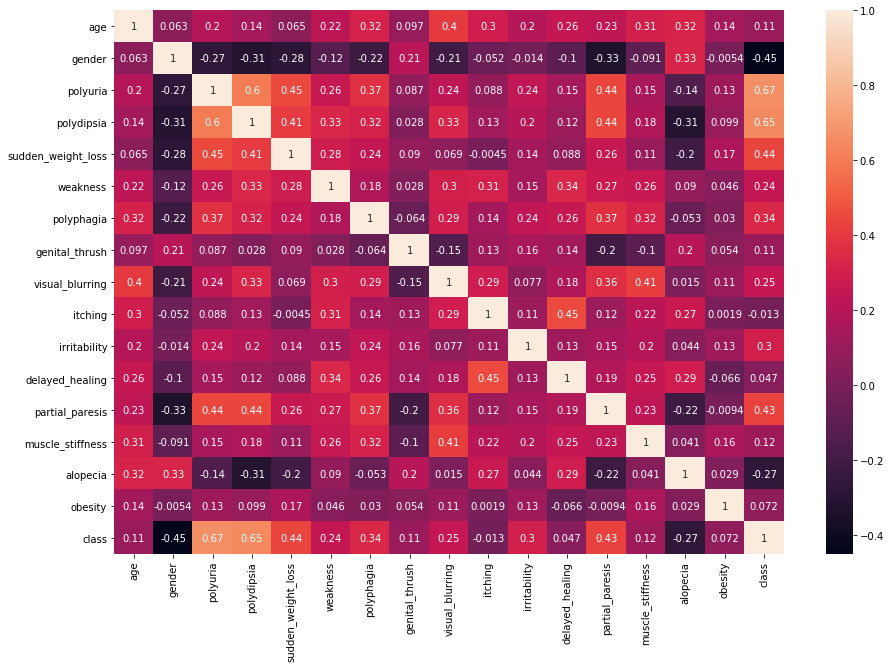

In [188]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [189]:
corr_matrix=df.corr()

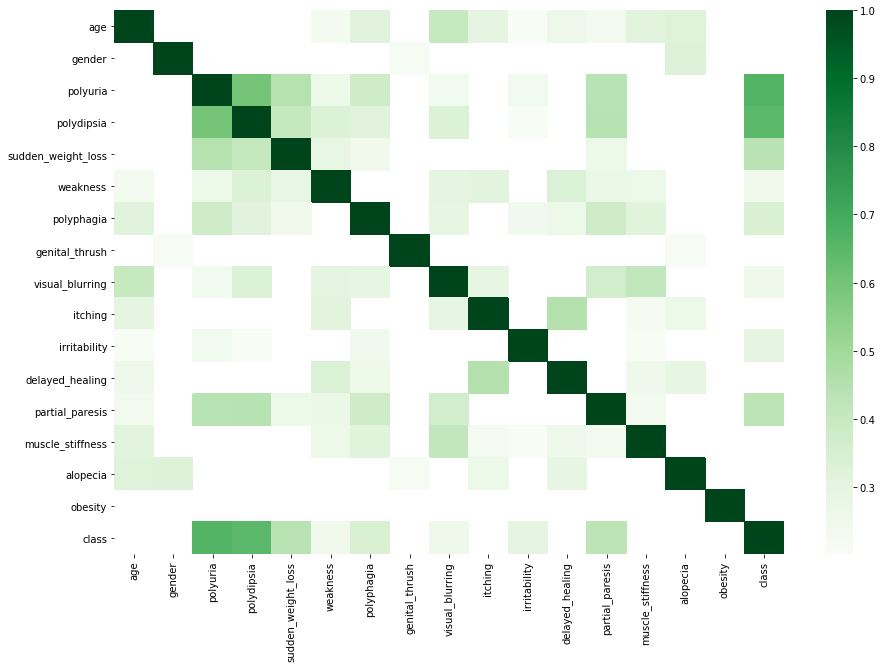

In [192]:
highest_corr=corr_matrix[corr_matrix>=0.2]
plt.figure(figsize=(15,10))
sns.heatmap(highest_corr,cmap="Greens")


## List of Features with highest correlation

In [197]:
top_features_per_corr=corr_matrix.abs().unstack().sort_values(kind="quicksort")

In [198]:
print(top_features_per_corr)

obesity             itching               0.001894
itching             obesity               0.001894
                    sudden_weight_loss    0.004516
sudden_weight_loss  itching               0.004516
obesity             gender                0.005396
                                            ...   
polydipsia          polydipsia            1.000000
polyuria            polyuria              1.000000
gender              gender                1.000000
obesity             obesity               1.000000
class               class                 1.000000
Length: 289, dtype: float64


# Feature Engineering and Selection

In [199]:
from sklearn.feature_selection import SelectKBest,chi2,RFE

In [200]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [205]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [211]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [215]:
skb=SelectKBest(score_func=chi2,k=10)
best_feature_fit=skb.fit(x,y)

In [216]:
best_feature_fit

SelectKBest(score_func=<function chi2 at 0x000001D9AF7E5798>)

In [217]:
feature_score=pd.DataFrame(best_feature_fit.scores_,columns=["Feature_Scores"])

In [220]:
feature_score

,Feature_Scores
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [221]:
feature_col_name=pd.DataFrame(x.columns,columns=["Feature_name"])
best_feat_df=pd.concat([feature_score,feature_col_name],axis=1)

In [223]:
# higher the better
best_feat_df

,Feature_Scores,Feature_name
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [227]:
best_feat_df.nlargest(12,"Feature_Scores")["Feature_name"].unique()

array(['polydipsia', 'polyuria', 'sudden_weight_loss', 'partial_paresis',
       'gender', 'irritability', 'polyphagia', 'alopecia', 'age',
       'visual_blurring', 'weakness', 'genital_thrush'], dtype=object)

In [244]:
best_feat_df.sort_values(by="Feature_Scores",ascending=False)

,Feature_Scores,Feature_name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


In [245]:
print(x.columns)

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')


# Finding the best suitable model

In [251]:
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.3)

### Using Logistic Regression 

In [253]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [254]:
lr_model.score(x_test,y_test)

0.8910256410256411

In [255]:
y_pred=lr_model.predict(x_test)

In [257]:
print("The accuracy of the Logistic model is : "+str(accuracy_score(y_pred,y_test)))

The accuracy of the model is : 0.8910256410256411


### Using Decision Tree Classifier

In [258]:
dt_model=DecisionTreeClassifier()

In [260]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [263]:
print("The accuracy of the Decision Tree Classifier model is : "+str(dt_model.score(x_test,y_test)))

The accuracy of the Decision Tree Classifier model is : 0.9487179487179487


### Using RandomForest Classifier

In [280]:
rf_model=RandomForestClassifier()

In [281]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [282]:
print("The accuracy of the Decision Tree Classifier model is : "+str(rf_model.score(x_test,y_test)))

The accuracy of the Decision Tree Classifier model is : 0.9551282051282052


### So the best model turn out to be Random Forest Classifier with an accuracy of 0.96

# Saving the model

In [297]:
import joblib
import pickle

In [298]:
model_file=open("./model/Logistic_reg_diabetes.pkl","wb")
pickle.dump(lr_model,model_file)


In [299]:
model_file=open("./model/Decision_tree_diabetes.pkl","wb")
pickle.dump(dt_model,model_file)


In [300]:
model_file=open("./model/RandomForest_diabetes.pkl","wb")
pickle.dump(rf_model,model_file)
